**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*4_Model_Selection_Neural_Networks* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: March 1, 2020 <br>
Date Updated: March 4, 2020

----

**Note: This needs to be run from the tfcs109a Conda Environment**

**Model Selection Strategy** <br>
1. Lasso <br>
2. Random Forest <br>
3. Neural Networks

**Set Seed for Randomness**

In [1]:
# See Random Seed
from numpy.random import seed
seed(13)

import tensorflow
tensorflow.random.set_seed(13)

**Load Packages**

In [2]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz
import pydot

import statsmodels.formula.api as sm
from pprint import pprint

import itertools

Using TensorFlow backend.


----

**Load Data**

In [3]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df_knn.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767,1960.0
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767,1961.0
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767,1962.0
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007,1963.0
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007,1964.0


In [4]:
# Load In Sample

in_sample = pd.read_csv('../../2_Inputs/Final/in_sample.csv')
in_sample = in_sample.drop(["Unnamed: 0"], axis = 1)
in_sample.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [5]:
# Load Lock Box

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,57.110746,1.679,-16498.2,28.60,63.3770,4.9760,2.478662,24.50,-1.117563,2015.0
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,58.104539,1.634,-16498.2,29.50,63.7630,4.8000,2.519923,25.64,-1.039843,2016.0
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.008129,1.559,-314602.0,29.80,64.1300,4.6330,2.554251,22.98,-0.992470,2017.0
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.244647,1.542,-32328.2,27.96,63.3522,4.9862,2.584927,25.86,-0.994720,2018.0
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,...,73.166459,17.080,-131596.4,6.00,78.0250,1.6770,12.626548,17.16,0.157149,2015.0


In [51]:
# Load Validation Table

results = pd.read_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 2.csv')
results = results.drop(["Unnamed: 0"], axis = 1)
results.head()

,Model Name,Model Type,Minimum RMSE,Variables
0,Linear Regression,Linear Model,225737.44,2306
1,Ridge Regression,Linear Model,1320499.00,2304
2,Lasso Regression,Linear Model,35.20,885
3,Random Forest,Tree-Based,50.88,2303


----

**Prerequisites**

In [7]:
in_sample.loc[:,'longitude':].shape

(6626, 2307)

In [8]:
# Xs

Xs = in_sample.loc[:,'longitude':]
Xs = Xs.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
Xs.shape

(6626, 2306)

In [9]:
# y

y = in_sample['Foreign direct investment, net inflows (% of GDP)']
y.shape

(6626,)

In [10]:
# Check for missing values
# No missing values

print("Xs: ", Xs.isnull().values.any())
print("y: ", y.isnull().values.any())

Xs:  False
y:  False


In [13]:
# Check for all zeroes

print("Xs: ", Xs.columns[(Xs == 0).all()])
Xs = Xs.drop(['EBRD..private.nonguaranteed..NFL..current.US..'], axis = 1)
Xs.shape

Xs:  Index(['EBRD..private.nonguaranteed..NFL..current.US..'], dtype='object')


(6626, 2305)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(in_sample.loc[:,'longitude':], in_sample.loc[:,'Foreign direct investment, net inflows (% of GDP)'], test_size=0.2, random_state=13)

In [15]:
X_train = X_train.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
X_test = X_test.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)

In [16]:
# Check Dimensions

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5300, 2306)
(5300,)
(1326, 2306)
(1326,)


****

**Normalize Date Between O and 1** <br>
*Use Normalization because not assuming normality of the data* <br>
Docs: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In [17]:
# Normalize X-Values

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
Xs_normalized = scaler.fit_transform(Xs)
Xs_normalized.shape

(6626, 2305)

In [18]:
# Normalize Y-Value

# fit and transform in one step
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))
y_normalized.shape

(6626, 1)

In [19]:
# Create Numpy Array for Y Values

y_np = np.asanyarray(y)
print(y_np[0:5])
print(y_np.shape)
print(y_np.dtype)

(6626,)
float64


----

**Model Selection: Neural Networks**

*Deep Neural Networks (DNN)* <br>
Docs: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33 <br>
Hyptertuning:https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ <br>
Resources: Homework from Harvard Compsci 209a <br>

In [20]:
##DNN
#
#NN_model = Sequential()
#
## The Input Layer :
#NN_model.add(Dense(128, kernel_initializer='normal',input_shape = (X_train.shape[1],), activation='relu'))
#
## The Hidden Layers :
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#
## The Output Layer :
#NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#
## Compile the network :
#NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#NN_model.summary()

In [21]:
## Define a Checkpoint
#
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#callbacks_list = [checkpoint]

In [22]:
##Train the DNN
#
#NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [25]:
# DNN 1

batch_size = 100
epochs = 100
num_classes = 2 
nodes_layers = [256,256,256]  #[100,100, 100]  #[80,80,80] #[100,100, 100] 
kernel_weight = 0.003
bias_weight = 0.003
activity_weight = 0.0

# create model
model1 = Sequential()
# The Input Layer: 
model1.add(Dense(128, input_shape=(2305, ), activation='relu'))
# The Hidden Layers:
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

print(model1.summary())

#optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)

#model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               295168    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 460,033
Trainable params: 460,033
Non-trainable params: 0
_________________________________________________________________
None


Train on 4638 samples, validate on 1988 samples
Epoch 1/100
4638/4638 [==============================] - 1s 310us/sample - loss: 2165.6030 - mean_squared_error: 2165.6033 - val_loss: 63.4768 - val_mean_squared_error: 63.4768
Epoch 2/100
4638/4638 [==============================] - 0s 91us/sample - loss: 1841.1262 - mean_squared_error: 1841.1260 - val_loss: 25.0078 - val_mean_squared_error: 25.0078
Epoch 3/100
4638/4638 [==============================] - 0s 87us/sample - loss: 1341.5364 - mean_squared_error: 1341.5364 - val_loss: 25.3024 - val_mean_squared_error: 25.3024
Epoch 4/100
4638/4638 [==============================] - 0s 86us/sample - loss: 640.5823 - mean_squared_error: 640.5823 - val_loss: 25.6899 - val_mean_squared_error: 25.6899
Epoch 5/100
4638/4638 [==============================] - 0s 86us/sample - loss: 622.8833 - mean_squared_error: 622.8834 - val_loss: 25.1689 - val_mean_squared_error: 25.1689
Epoch 6/100
4638/4638 [==============================] - 0s 86us/sample - l

4638/4638 [==============================] - 0s 94us/sample - loss: 222.9412 - mean_squared_error: 222.9412 - val_loss: 23.4859 - val_mean_squared_error: 23.4859
Epoch 48/100
4638/4638 [==============================] - 0s 94us/sample - loss: 202.4161 - mean_squared_error: 202.4162 - val_loss: 22.2335 - val_mean_squared_error: 22.2335
Epoch 49/100
4638/4638 [==============================] - 0s 93us/sample - loss: 128.6520 - mean_squared_error: 128.6520 - val_loss: 29.9621 - val_mean_squared_error: 29.9621
Epoch 50/100
4638/4638 [==============================] - 0s 92us/sample - loss: 408.9313 - mean_squared_error: 408.9313 - val_loss: 21.1431 - val_mean_squared_error: 21.1431
Epoch 51/100
4638/4638 [==============================] - 0s 92us/sample - loss: 239.2428 - mean_squared_error: 239.2428 - val_loss: 22.0012 - val_mean_squared_error: 22.0012
Epoch 52/100
4638/4638 [==============================] - 0s 92us/sample - loss: 152.7576 - mean_squared_error: 152.7576 - val_loss: 30.93

Epoch 94/100
4638/4638 [==============================] - 0s 97us/sample - loss: 157.6119 - mean_squared_error: 157.6119 - val_loss: 23.0394 - val_mean_squared_error: 23.0394
Epoch 95/100
4638/4638 [==============================] - 0s 96us/sample - loss: 226.2146 - mean_squared_error: 226.2146 - val_loss: 22.9515 - val_mean_squared_error: 22.9515
Epoch 96/100
4638/4638 [==============================] - 0s 95us/sample - loss: 101.3598 - mean_squared_error: 101.3598 - val_loss: 22.1175 - val_mean_squared_error: 22.1175
Epoch 97/100
4638/4638 [==============================] - 1s 112us/sample - loss: 86.4618 - mean_squared_error: 86.4618 - val_loss: 21.8439 - val_mean_squared_error: 21.8439
Epoch 98/100
4638/4638 [==============================] - 1s 109us/sample - loss: 225.3821 - mean_squared_error: 225.3821 - val_loss: 21.2499 - val_mean_squared_error: 21.2499
Epoch 99/100
4638/4638 [==============================] - 1s 120us/sample - loss: 229.9559 - mean_squared_error: 229.9559 - v

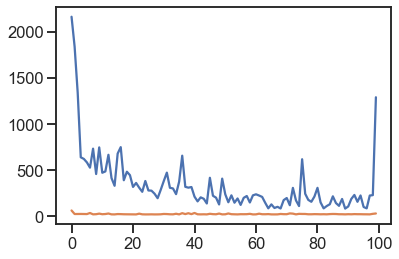

In [26]:
history_basic = model1.fit(Xs_normalized, y_np, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=1) #y_normalized

mse = model1.evaluate(Xs_normalized, y_np, verbose=False) #y_np
print("Training:", mse)

val_loss = history_basic.history['val_loss'][-1]
print("Val Acc:",val_loss)
print("Diff:", mse-val_loss)



plt.plot(history_basic.history['mean_squared_error'])
plt.plot(history_basic.history['val_loss']);

In [27]:
# Save DNN 1 for later use

# serialize model to JSON
model1_json = model1.to_json()
with open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.h5")
print("Saved model to disk")

Saved model to disk


*Use GridSearchCV to optomize the model* <br>
Docs: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [28]:
## Function to create model, required for KerasClassifier
#def create_model():
#    # create model
#    
#    #reset the model 
#    model = tf.keras.models.Sequential()
#    # first hidden layer
#    model.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(2313,)))
#    # hidden layers 
#    for s in nodes_layers[1:]:
#        model.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
#                                        kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
#                                        bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
#        model.add(tf.keras.layers.Dropout(0.1))
#    
#    # output layer 
#    model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))
#
#
#    # Compile model
#    optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)
#    model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mean_squared_error'])
#    
#    #Return model
#    return model

In [29]:
# Function to create model, required for KerasRegressor
def create_model():
    # create model
    model = Sequential()
    # The Input Layer: 
    model.add(Dense(128, input_shape=(2305,), activation='relu'))
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    # The Output Layer
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [30]:
# Create model

model = KerasRegressor(build_fn=create_model, verbose=1)

In [35]:
# Define the grid search parameters

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 100, 300]
validation_split=[.1, .2, .3]
param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=3, cv=3)

In [36]:
# Run Model

grid_result = grid.fit(Xs_normalized, y_np)

Train on 5300 samples, validate on 1326 samples
Epoch 1/300
5300/5300 [==============================] - 2s 283us/sample - loss: 1894.9541 - mean_squared_error: 1894.9540 - val_loss: 26.8496 - val_mean_squared_error: 26.8496
Epoch 2/300
5300/5300 [==============================] - 1s 102us/sample - loss: 1490.0490 - mean_squared_error: 1490.0492 - val_loss: 247.9518 - val_mean_squared_error: 247.9519
Epoch 3/300
5300/5300 [==============================] - 1s 101us/sample - loss: 1096.0419 - mean_squared_error: 1096.0419 - val_loss: 26.0472 - val_mean_squared_error: 26.0472
Epoch 4/300
5300/5300 [==============================] - 1s 100us/sample - loss: 621.4915 - mean_squared_error: 621.4915 - val_loss: 22.1015 - val_mean_squared_error: 22.1015
Epoch 5/300
5300/5300 [==============================] - 1s 105us/sample - loss: 534.7962 - mean_squared_error: 534.7962 - val_loss: 21.3122 - val_mean_squared_error: 21.3122
Epoch 6/300
5300/5300 [==============================] - 1s 105us/sam

5300/5300 [==============================] - 1s 104us/sample - loss: 1881.0605 - mean_squared_error: 1881.0604 - val_loss: 26.8687 - val_mean_squared_error: 26.8687
Epoch 48/300
5300/5300 [==============================] - 1s 103us/sample - loss: 1859.8974 - mean_squared_error: 1859.8977 - val_loss: 29.7123 - val_mean_squared_error: 29.7123
Epoch 49/300
5300/5300 [==============================] - 1s 103us/sample - loss: 1811.3712 - mean_squared_error: 1811.3711 - val_loss: 20.8136 - val_mean_squared_error: 20.8136
Epoch 50/300
5300/5300 [==============================] - 1s 103us/sample - loss: 1723.3761 - mean_squared_error: 1723.3762 - val_loss: 26.9297 - val_mean_squared_error: 26.9297
Epoch 51/300
5300/5300 [==============================] - 1s 103us/sample - loss: 1492.8103 - mean_squared_error: 1492.8104 - val_loss: 45.9037 - val_mean_squared_error: 45.9037
Epoch 52/300
5300/5300 [==============================] - 1s 103us/sample - loss: 1225.2147 - mean_squared_error: 1225.2146

5300/5300 [==============================] - 1s 103us/sample - loss: 318.5577 - mean_squared_error: 318.5577 - val_loss: 22.0736 - val_mean_squared_error: 22.0736
Epoch 94/300
5300/5300 [==============================] - 1s 103us/sample - loss: 294.6464 - mean_squared_error: 294.6463 - val_loss: 22.3822 - val_mean_squared_error: 22.3822
Epoch 95/300
5300/5300 [==============================] - 1s 102us/sample - loss: 264.1213 - mean_squared_error: 264.1213 - val_loss: 22.3603 - val_mean_squared_error: 22.3603
Epoch 96/300
5300/5300 [==============================] - 1s 103us/sample - loss: 308.4435 - mean_squared_error: 308.4435 - val_loss: 22.7852 - val_mean_squared_error: 22.7852
Epoch 97/300
5300/5300 [==============================] - 1s 103us/sample - loss: 280.7766 - mean_squared_error: 280.7766 - val_loss: 22.4124 - val_mean_squared_error: 22.4124
Epoch 98/300
5300/5300 [==============================] - 1s 103us/sample - loss: 260.7495 - mean_squared_error: 260.7495 - val_loss:

5300/5300 [==============================] - 1s 103us/sample - loss: 201.0559 - mean_squared_error: 201.0559 - val_loss: 22.4751 - val_mean_squared_error: 22.4751
Epoch 140/300
5300/5300 [==============================] - 1s 103us/sample - loss: 210.1432 - mean_squared_error: 210.1432 - val_loss: 22.0634 - val_mean_squared_error: 22.0634
Epoch 141/300
5300/5300 [==============================] - 1s 103us/sample - loss: 146.2849 - mean_squared_error: 146.2849 - val_loss: 21.9219 - val_mean_squared_error: 21.9219
Epoch 142/300
5300/5300 [==============================] - 1s 103us/sample - loss: 214.1225 - mean_squared_error: 214.1225 - val_loss: 22.0277 - val_mean_squared_error: 22.0277
Epoch 143/300
5300/5300 [==============================] - 1s 103us/sample - loss: 158.9314 - mean_squared_error: 158.9314 - val_loss: 22.2388 - val_mean_squared_error: 22.2388
Epoch 144/300
5300/5300 [==============================] - 1s 102us/sample - loss: 159.9102 - mean_squared_error: 159.9102 - val_

5300/5300 [==============================] - 1s 106us/sample - loss: 106.4948 - mean_squared_error: 106.4947 - val_loss: 22.4686 - val_mean_squared_error: 22.4686
Epoch 186/300
5300/5300 [==============================] - 1s 106us/sample - loss: 105.3432 - mean_squared_error: 105.3432 - val_loss: 22.1352 - val_mean_squared_error: 22.1352
Epoch 187/300
5300/5300 [==============================] - 1s 106us/sample - loss: 105.3388 - mean_squared_error: 105.3388 - val_loss: 22.2569 - val_mean_squared_error: 22.2569
Epoch 188/300
5300/5300 [==============================] - 1s 105us/sample - loss: 171.9665 - mean_squared_error: 171.9665 - val_loss: 22.1009 - val_mean_squared_error: 22.1009
Epoch 189/300
5300/5300 [==============================] - 1s 106us/sample - loss: 102.8908 - mean_squared_error: 102.8908 - val_loss: 22.2465 - val_mean_squared_error: 22.2465
Epoch 190/300
5300/5300 [==============================] - 1s 105us/sample - loss: 91.5857 - mean_squared_error: 91.5857 - val_lo

Epoch 232/300
5300/5300 [==============================] - 1s 105us/sample - loss: 69.4455 - mean_squared_error: 69.4455 - val_loss: 21.9812 - val_mean_squared_error: 21.9812
Epoch 233/300
5300/5300 [==============================] - 1s 105us/sample - loss: 75.2564 - mean_squared_error: 75.2564 - val_loss: 21.7986 - val_mean_squared_error: 21.7986
Epoch 234/300
5300/5300 [==============================] - 1s 104us/sample - loss: 83.7479 - mean_squared_error: 83.7479 - val_loss: 22.2228 - val_mean_squared_error: 22.2228
Epoch 235/300
5300/5300 [==============================] - 1s 104us/sample - loss: 73.6816 - mean_squared_error: 73.6816 - val_loss: 22.3658 - val_mean_squared_error: 22.3658
Epoch 236/300
5300/5300 [==============================] - 1s 104us/sample - loss: 79.1689 - mean_squared_error: 79.1689 - val_loss: 22.4566 - val_mean_squared_error: 22.4566
Epoch 237/300
5300/5300 [==============================] - 1s 103us/sample - loss: 68.4519 - mean_squared_error: 68.4519 - va

Epoch 279/300
5300/5300 [==============================] - 1s 106us/sample - loss: 69.2403 - mean_squared_error: 69.2403 - val_loss: 22.1397 - val_mean_squared_error: 22.1397
Epoch 280/300
5300/5300 [==============================] - 1s 107us/sample - loss: 62.9182 - mean_squared_error: 62.9182 - val_loss: 22.1835 - val_mean_squared_error: 22.1835
Epoch 281/300
5300/5300 [==============================] - 1s 107us/sample - loss: 60.5649 - mean_squared_error: 60.5648 - val_loss: 22.1018 - val_mean_squared_error: 22.1019
Epoch 282/300
5300/5300 [==============================] - 1s 106us/sample - loss: 61.4180 - mean_squared_error: 61.4180 - val_loss: 21.8843 - val_mean_squared_error: 21.8843
Epoch 283/300
5300/5300 [==============================] - 1s 105us/sample - loss: 60.4984 - mean_squared_error: 60.4984 - val_loss: 21.9211 - val_mean_squared_error: 21.9211
Epoch 284/300
5300/5300 [==============================] - 1s 107us/sample - loss: 60.6050 - mean_squared_error: 60.6050 - va

In [37]:
# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -370.095925 using {'batch_size': 80, 'epochs': 300, 'validation_split': 0.2}
-1543.231876 (1076.308683) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.1}
-1191.022586 (891.871002) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.2}
-1212.567589 (959.635843) with: {'batch_size': 10, 'epochs': 10, 'validation_split': 0.3}
-949.264852 (934.951031) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.1}
-1552.422143 (1066.382607) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.2}
-409.018074 (275.283196) with: {'batch_size': 10, 'epochs': 100, 'validation_split': 0.3}
-1036.236606 (904.897472) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.1}
-756.999905 (583.399960) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.2}
-1017.879067 (912.733977) with: {'batch_size': 10, 'epochs': 300, 'validation_split': 0.3}
-1543.918869 (1077.122080) with: {'batch_size': 20, 'epochs': 10, 'validation_split': 0.1}
-1003.31712

In [38]:
# Prep Best Model

model2 = Sequential()
# The Input Layer: 
model2.add(Dense(128, input_shape=(2305,), activation='relu'))
# The Hidden Layers:
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer
model2.add(Dense(1, activation='linear'))
# Compile model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Train on 5300 samples, validate on 1326 samples
Epoch 1/300
5300/5300 [==============================] - 1s 223us/sample - loss: 1896.9543 - mean_squared_error: 1896.9543 - val_loss: 27.8538 - val_mean_squared_error: 27.8538
Epoch 2/300
5300/5300 [==============================] - 0s 92us/sample - loss: 1519.4202 - mean_squared_error: 1519.4200 - val_loss: 278.4397 - val_mean_squared_error: 278.4397
Epoch 3/300
5300/5300 [==============================] - 0s 93us/sample - loss: 1136.9305 - mean_squared_error: 1136.9304 - val_loss: 31.3949 - val_mean_squared_error: 31.3949
Epoch 4/300
5300/5300 [==============================] - 0s 94us/sample - loss: 646.3425 - mean_squared_error: 646.3425 - val_loss: 20.5044 - val_mean_squared_error: 20.5044
Epoch 5/300
5300/5300 [==============================] - 0s 93us/sample - loss: 538.1155 - mean_squared_error: 538.1154 - val_loss: 19.9207 - val_mean_squared_error: 19.9207
Epoch 6/300
5300/5300 [==============================] - 0s 93us/sample -

5300/5300 [==============================] - 1s 102us/sample - loss: 253.5900 - mean_squared_error: 253.5900 - val_loss: 24.7959 - val_mean_squared_error: 24.7959
Epoch 48/300
5300/5300 [==============================] - 1s 100us/sample - loss: 292.2872 - mean_squared_error: 292.2872 - val_loss: 21.2981 - val_mean_squared_error: 21.2981
Epoch 49/300
5300/5300 [==============================] - 1s 100us/sample - loss: 216.8450 - mean_squared_error: 216.8451 - val_loss: 21.5739 - val_mean_squared_error: 21.5739
Epoch 50/300
5300/5300 [==============================] - 1s 101us/sample - loss: 250.4636 - mean_squared_error: 250.4636 - val_loss: 21.4496 - val_mean_squared_error: 21.4496
Epoch 51/300
5300/5300 [==============================] - 1s 100us/sample - loss: 223.3840 - mean_squared_error: 223.3840 - val_loss: 21.9924 - val_mean_squared_error: 21.9924
Epoch 52/300
5300/5300 [==============================] - 1s 115us/sample - loss: 225.2551 - mean_squared_error: 225.2551 - val_loss:

Epoch 94/300
5300/5300 [==============================] - 1s 112us/sample - loss: 104.7376 - mean_squared_error: 104.7376 - val_loss: 21.7882 - val_mean_squared_error: 21.7882
Epoch 95/300
5300/5300 [==============================] - 1s 110us/sample - loss: 312.6940 - mean_squared_error: 312.6940 - val_loss: 22.0861 - val_mean_squared_error: 22.0861
Epoch 96/300
5300/5300 [==============================] - 1s 115us/sample - loss: 142.7993 - mean_squared_error: 142.7993 - val_loss: 56.1925 - val_mean_squared_error: 56.1925
Epoch 97/300
5300/5300 [==============================] - 1s 104us/sample - loss: 156.9199 - mean_squared_error: 156.9199 - val_loss: 32.9873 - val_mean_squared_error: 32.9873
Epoch 98/300
5300/5300 [==============================] - 1s 107us/sample - loss: 198.3202 - mean_squared_error: 198.3202 - val_loss: 21.7437 - val_mean_squared_error: 21.7437
Epoch 99/300
5300/5300 [==============================] - 1s 104us/sample - loss: 158.3638 - mean_squared_error: 158.363

5300/5300 [==============================] - 1s 104us/sample - loss: 64.5818 - mean_squared_error: 64.5818 - val_loss: 19.2690 - val_mean_squared_error: 19.2690
Epoch 141/300
5300/5300 [==============================] - 1s 105us/sample - loss: 69.3640 - mean_squared_error: 69.3640 - val_loss: 19.9014 - val_mean_squared_error: 19.9014
Epoch 142/300
5300/5300 [==============================] - 1s 104us/sample - loss: 105.8526 - mean_squared_error: 105.8525 - val_loss: 19.4105 - val_mean_squared_error: 19.4105
Epoch 143/300
5300/5300 [==============================] - 1s 104us/sample - loss: 83.1870 - mean_squared_error: 83.1870 - val_loss: 19.8852 - val_mean_squared_error: 19.8852
Epoch 144/300
5300/5300 [==============================] - 1s 105us/sample - loss: 127.8287 - mean_squared_error: 127.8287 - val_loss: 20.8980 - val_mean_squared_error: 20.8980
Epoch 145/300
5300/5300 [==============================] - 1s 105us/sample - loss: 108.6603 - mean_squared_error: 108.6603 - val_loss: 

Epoch 187/300
5300/5300 [==============================] - 1s 103us/sample - loss: 78.8761 - mean_squared_error: 78.8761 - val_loss: 19.7113 - val_mean_squared_error: 19.7113
Epoch 188/300
5300/5300 [==============================] - 1s 103us/sample - loss: 111.2432 - mean_squared_error: 111.2432 - val_loss: 19.7068 - val_mean_squared_error: 19.7068
Epoch 189/300
5300/5300 [==============================] - 1s 103us/sample - loss: 86.7313 - mean_squared_error: 86.7313 - val_loss: 19.9474 - val_mean_squared_error: 19.9474
Epoch 190/300
5300/5300 [==============================] - 1s 102us/sample - loss: 63.3859 - mean_squared_error: 63.3859 - val_loss: 19.6331 - val_mean_squared_error: 19.6331
Epoch 191/300
5300/5300 [==============================] - 1s 104us/sample - loss: 72.4811 - mean_squared_error: 72.4811 - val_loss: 19.5510 - val_mean_squared_error: 19.5510
Epoch 192/300
5300/5300 [==============================] - 1s 103us/sample - loss: 70.2412 - mean_squared_error: 70.2412 - 

Epoch 234/300
5300/5300 [==============================] - 1s 103us/sample - loss: 51.4509 - mean_squared_error: 51.4509 - val_loss: 20.1395 - val_mean_squared_error: 20.1395
Epoch 235/300
5300/5300 [==============================] - 1s 124us/sample - loss: 48.7543 - mean_squared_error: 48.7543 - val_loss: 21.0298 - val_mean_squared_error: 21.0298
Epoch 236/300
5300/5300 [==============================] - 1s 119us/sample - loss: 48.0322 - mean_squared_error: 48.0322 - val_loss: 20.1091 - val_mean_squared_error: 20.1091
Epoch 237/300
5300/5300 [==============================] - 1s 119us/sample - loss: 42.3622 - mean_squared_error: 42.3622 - val_loss: 19.8662 - val_mean_squared_error: 19.8662
Epoch 238/300
5300/5300 [==============================] - 1s 122us/sample - loss: 43.6225 - mean_squared_error: 43.6225 - val_loss: 19.2410 - val_mean_squared_error: 19.2410
Epoch 239/300
5300/5300 [==============================] - 1s 105us/sample - loss: 64.9094 - mean_squared_error: 64.9094 - va

Epoch 281/300
5300/5300 [==============================] - 1s 105us/sample - loss: 44.1813 - mean_squared_error: 44.1813 - val_loss: 18.5378 - val_mean_squared_error: 18.5378
Epoch 282/300
5300/5300 [==============================] - 1s 103us/sample - loss: 45.3757 - mean_squared_error: 45.3757 - val_loss: 18.5916 - val_mean_squared_error: 18.5916
Epoch 283/300
5300/5300 [==============================] - 1s 103us/sample - loss: 37.4403 - mean_squared_error: 37.4403 - val_loss: 18.5314 - val_mean_squared_error: 18.5314
Epoch 284/300
5300/5300 [==============================] - 1s 103us/sample - loss: 37.2032 - mean_squared_error: 37.2032 - val_loss: 18.4807 - val_mean_squared_error: 18.4807
Epoch 285/300
5300/5300 [==============================] - 1s 103us/sample - loss: 39.9158 - mean_squared_error: 39.9158 - val_loss: 22.0744 - val_mean_squared_error: 22.0744
Epoch 286/300
5300/5300 [==============================] - 1s 103us/sample - loss: 36.3160 - mean_squared_error: 36.3160 - va

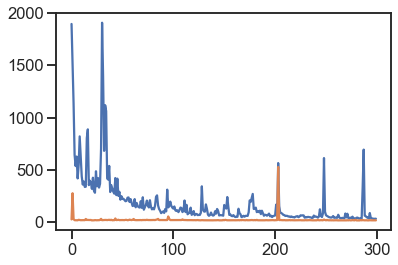

In [39]:
# Run Best Model

history_basic2 = model2.fit(Xs_normalized, y_np, batch_size=80, epochs=300,  validation_split=0.2, verbose=1) #X_train, y_train,

loss2 = model2.evaluate(Xs_normalized, y_np, verbose=False)
print("Training:", loss2)

val_loss2 = history_basic2.history['val_loss'][-1]
print("Val Acc:",val_loss2)
print("Diff:", loss2-val_loss2)



plt.plot(history_basic2.history['mean_squared_error'])
plt.plot(history_basic2.history['val_loss']);

In [40]:
# Save DNN 2 for later use

# serialize model to JSON
model2_json = model2.to_json()
with open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.h5")
print("Saved optimum model to disk")

Saved optimum model to disk


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               295168    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 460,033
Trainable params: 460,033
Non-trainable params: 0
_________________________________________________________________
None


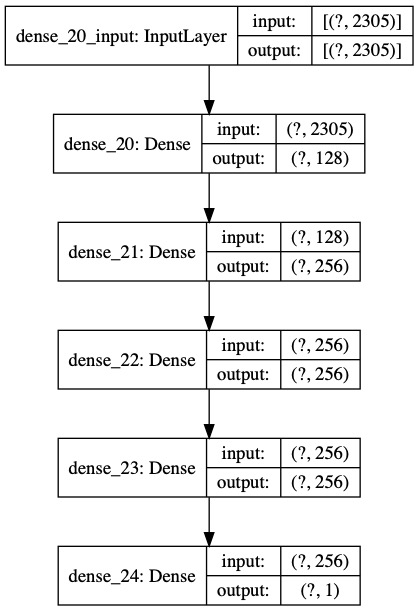

In [41]:
# Summary 
model2_summary = model2.summary()
print(model2_summary)
tf.keras.utils.plot_model(model2, to_file='../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_summary.jpg', show_shapes=True, show_layer_names=True)

In [42]:
# Print Final RMSE

optimum_rmse = round(np.sqrt(370.095925), 2)
print(optimum_rmse)

19.24


*Variable Importance for the NN* <br>
Docs: https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python/45371222

In [43]:
## See Metrics
#
#sklearn.metrics.SCORERS.keys()

In [44]:
## Variable Importance
#
#def base_model():
#    model2 = Sequential()        
#    # The Input Layer: 
#    model2.add(Dense(128, input_shape=(2313,), activation='relu'))
#    # The Hidden Layers:
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#    # The Output Layer
#    model2.add(Dense(1, activation='sigmoid'))
#    # Compile model
#    model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#    return model2
#
#my_model = KerasRegressor(build_fn=base_model)    
#my_model.fit(Xs,y)
#
#perm = PermutationImportance(my_model, random_state=13, scoring="neg_mean_squared_error").fit(Xs,y)
#eli5.show_weights(perm, feature_names = Xs.columns.tolist())

In [48]:
## Variable Importance
##https://medium.com/@mp.music93/neural-networks-feature-importance-with-fastai-5c393cf65815
#
## To include in fastai/structured.py
#from core import to_np, T
#
#def nn_feat_importance(m, md, cat_vars, cont_vars):
#    """ Computes the feature importance for each categorical and continuous column
#    m is a fastai.column_data.StructuredLearner
#    md is a fastai.column_data.ColumnarModelData
#    cat_vars is a list with the categorical vars names as used to define m and md
#    cont_vars is a list with the continuous vars names as used to define m and md
#    """
#    loss0 = np.array([to_np(m.crit(m.model(x_cat, x_cont), y)) for x_cat, x_cont, y in iter(md.val_dl)]).mean()
#    fi = dict()
#    for i, c in enumerate(cat_vars):
#        loss = []
#        for x_cat, x_cont, y in iter(md.val_dl):
#            rnd = T(np.random.permutation(x_cat.size()[0]))
#            x_cat[:, i] = x_cat[rnd, i]
#            loss.append(to_np(m.crit(m.model(x_cat, x_cont), y)))
#        fi[c] = np.mean(loss) - loss0
#    for i, c in enumerate(cont_vars):
#        loss = []
#        for x_cat, x_cont, y in iter(md.val_dl):
#            rnd = T(np.random.permutation(x_cat.size()[0]))
#            x_cont[:, i] = x_cont[rnd, i]
#            loss.append(to_np(m.crit(m.model(x_cat, x_cont), y)))
#        fi[c] = np.mean(loss) - loss0
#    d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
#    return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})

In [49]:
## Feature Importance
#
#cat_vars = []
#fi = nn_feat_importance(Xs_normalized, model2, cat_vars, Xs_normalized.columns.name)
#fi.plot(‘cols’, ‘imp’, ‘barh’, figsize=(12,7), legend=False)

*Store Results*

In [52]:
# Store Results

nn_results = pd.DataFrame({'Model Name': 'Deep Neural Networks (DNN)', 
                    'Model Type': 'Neural Networks', 
                    #'Accuracy': [round(cv_accuracy_ridge.max(), 2)],
                    'Minimum RMSE': [optimum_rmse], 
                    #'Maximum R2': [np.max(ridge_r2)], 
                    'Variables': [len(Xs.columns) - 3]})

results = results.append(nn_results).reset_index(drop=True)
print("\nResults Dataframe:\n", results)

results.to_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 3.csv')


Results Dataframe:
                    Model Name       Model Type  Minimum RMSE  Variables
0           Linear Regression     Linear Model     225737.44       2306
1            Ridge Regression     Linear Model    1320499.00       2304
2            Lasso Regression     Linear Model         35.20        885
3               Random Forest       Tree-Based         50.88       2303
4  Deep Neural Networks (DNN)  Neural Networks         19.24       2302
